<a href="https://colab.research.google.com/github/abayro125/MAT494/blob/main/2_4ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.4 Maximum Likelihood Estimation**

2.4.1 MLE for Random Samples
Maximum likelihood estimation (MLE) is an effective approach of estimating
the parameters of a probability distribution through maximizing a likelihood
function. The point in the parameter space that maximizes the likelihood
function is called the maximum likelihood estimate. The logic of maximum
likelihood is both intuitive and flexible.

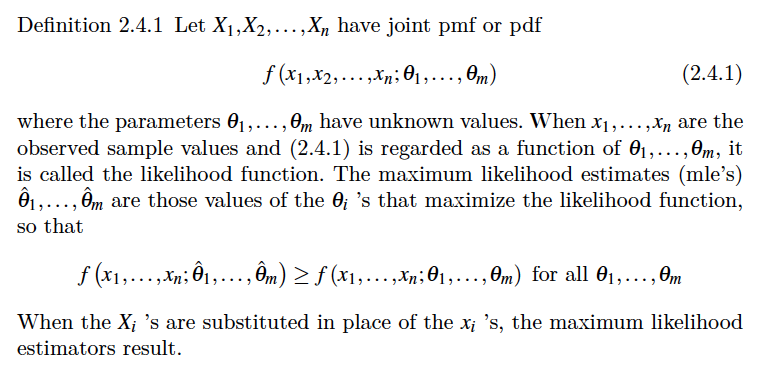

In [ ]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

data = sm.datasets.spector.load_pandas() #load data
exog = data.exog 
endog = data.endog
print(data.exog.head()) #prints the head of the data for viewing

exog = sm.add_constant(exog, prepend=True)


class MyProbit(GenericLikelihoodModel):
    def loglike(self, params):
        exog = self.exog
        endog = self.endog
        q = 2 * endog - 1
        return stats.norm.logcdf(q*np.dot(exog, params)).sum()

sm_probit_manual = MyProbit(endog, exog).fit()
print(sm_probit_manual.summary()) #prints the summary including the log-likelihood information

    GPA  TUCE  PSI
0  2.66  20.0  0.0
1  2.89  22.0  0.0
2  3.28  24.0  0.0
3  2.92  12.0  0.0
4  4.00  21.0  0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.400588
         Iterations: 292
         Function evaluations: 494
                               MyProbit Results                               
Dep. Variable:                  GRADE   Log-Likelihood:                -12.819
Model:                       MyProbit   AIC:                             33.64
Method:            Maximum Likelihood   BIC:                             39.50
Date:                Sat, 10 Sep 2022                                         
Time:                        23:06:59                                         
No. Observations:                  32                                         
Df Residuals:                      28                                         
Df Model:                           3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

2.4.2 Lienar Regression 

Given input data points {(xi,yi)}n
i=1, we seek an affine function to fit the data
and each xi =(xi1, ....,xip). The common approach involves finding coefficients
β j, j = 1..., p’s that minimize the criterion

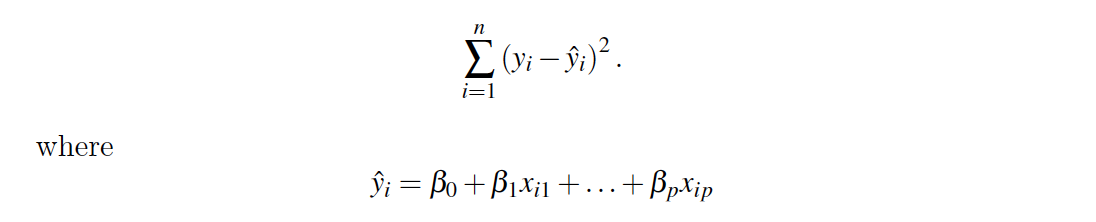

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]


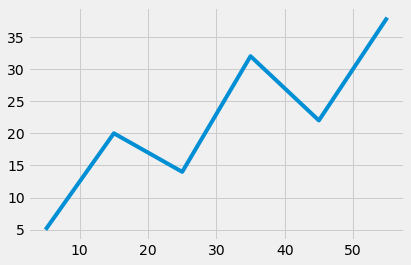

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) #arrray x
y = np.array([5, 20, 14, 32, 22, 38]) #array y
plt.plot(x,y) #plots the x vs. y

model = LinearRegression() #performs a linear regression analysis
model.fit(x, y) #fits the model 
model = LinearRegression().fit(x, y)


r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}") #prints the coefficient of determination
print(f"intercept: {model.intercept_}") #prints the intercepts
print(f"slope: {model.coef_}") #prints the slope
